# Tips dataset analysis

In [10]:
# numerical calculations libraries, assigning aliases
import numpy as np
import pandas as pd

# plotting and data visualisation libraries, assigning aliases
import matplotlib.pyplot as plt
import seaborn as sns

# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

### Loading the data set

Getting the data from _Seaborn_ package and assigning it to variable `tips`.

In [14]:
# Loading the data set
tips = sns.load_dataset("tips")

### The dataset basic properties and its integrity check 

In [21]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Hence, there are no 'empty' cells in the dataset, and the above looks good. Perhaps the _size_ variable could be change to int8 type, so that the memory usage could be optimised, but considering the small size of the dataset, I am going to leave it as is.

The initial checks show its integrity and I am satisfied to continue with further analysis.

___

## Data analysis

### 1. Exploratory data analysis (descriptive)

#### Sneak peek into raw data

Below are listed several first raws of data displayed. This listing allows to get initial impression on the dataset structure, as well as its attributes (columns) and data types of the variables.

In [29]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


For a quick glimpse into numeric values and basic statistical description, it is convenient to call `describe()` method. As a result it will show for each numerical attribute (column) information such as number of occurrence, minimum, median (50%) and maximum values, mean and standard deviation.

In [32]:
# calling describe method; percentiles will be limited to 50%, to keep the result compact; adapted from https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
  
tips.describe(percentiles = [0.5])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
50%,17.795000,2.900000,2.000000
max,50.810000,10.000000,6.000000


Interesting to see that tips were given every time. Also, the percent of mean tips is $13.16\%$ (=2.998279÷(19.785943+2.998279)).

Now, let's also see what are the unique values occur in each non-numeric (categorical) column, using Pandas' method `unique()`.

In [36]:
print("sex:\t", sorted(tips.sex.unique()))
print("smoker:\t", sorted(tips.smoker.unique()))

sex:	 ['Female', 'Male']
smoker:	 ['No', 'Yes']


In [38]:
# List unique values in the categorical atributes
# Adapted from https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/ and https://jovianlin.io/data-visualization-seaborn-part-1/.

print("Values occuring in column 'sex':\t", sorted(tips.sex.unique()))
print("Values occuring in column 'smoker':\t", sorted(tips.smoker.unique()))
print("Values occuring in column 'day':\t", sorted(tips.day.unique()))
print("Values occuring in column 'time':\t", sorted(tips.time.unique()))

Values occuring in column 'sex':	 ['Female', 'Male']
Values occuring in column 'smoker':	 ['No', 'Yes']
Values occuring in column 'day':	 ['Fri', 'Sat', 'Sun', 'Thur']
Values occuring in column 'time':	 ['Dinner', 'Lunch']


#### Raw data modeling

It would be interesting to consider and evaluate the relationship between the data which is not explicitly given. For this purpose, let's model the dataset by creating new attributes. I am going to create the following:
- `tip_ratio` - ratio of tip to bill,
- `sum` - the sum of total bill and tip,
- `percent` - tip as a percent of sum,
- `bpp` - amount of total bill divided by number of people in the group,
- `tpp` - amount of tip per person.

In [42]:
# new column created - percent of tip
tips["tip_ratio"] = tips["tip"]/tips["total_bill"] 

# new column created - sum of total bill and tip
tips["sum"] = tips["total_bill"]+tips["tip"] # appended at the end of the array

# new column created - ratio of tip to sum
tips["percent"] = round(tips["tip"]/tips["sum"]*100, 2)

# add column: bpp - bill per person
tips["bpp"] = tips["total_bill"]/tips["size"]

# add column: tpp - tip per person
tips["tpp"] = tips["tip"]/tips["size"]


Now, let's see what the dataset array looks like with the additional attributes. To keep it compact, just a few first rows.

In [45]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,tip_ratio,sum,percent,bpp,tpp
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,18.0,5.61,8.495000,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,12.0,13.83,3.446667,0.553333


Let's use the `describe()` method again for the upgraded data array.

In [48]:
# calling describe method; percentiles will be limited to 50%, to keep the result compact
tips.describe(percentiles = [0.5])

,total_bill,tip,size,tip_ratio,sum,percent,bpp,tpp
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000
mean,19.785943,2.998279,2.569672,0.160803,22.784221,13.643320,7.88823,1.212762
std,8.902412,1.383638,0.951100,0.061072,9.890116,4.058544,2.91435,0.491705
min,3.070000,1.000000,1.000000,0.035638,4.070000,3.440000,2.87500,0.400000
50%,17.795000,2.900000,2.000000,0.154770,20.600000,13.405000,7.25500,1.107500
max,50.810000,10.000000,6.000000,0.710345,60.810000,41.530000,20.27500,3.333333


From the above we can get some interesting observations:
1. on average for the entire dataset, the percent of tip is $13.64\%$ (which is slightly higher than the value calculated above for mean tip and mean total bill),
2. on average, total bill split equally in the group is 7.89,
3. on average, tip per person is 1.21.

For comparison, I am going to apply a filter and see what is, for example, the average ratio tip to total bill among smokers.

In [52]:
# mean tip per smoking person
print("Average tip per smoking person:\t\t\t", tips[tips["smoker"] == "Yes"]["tpp"].mean()) # filtering by applying conditional check (smoker=yes)

# mean total bill among smokers
print("Average total bill among smokers:\t\t", tips[tips["smoker"] == "Yes"]["total_bill"].mean())

# mean ratio among smokers
tips["ratio_smoke"] = tips[tips["smoker"] == "Yes"]["tip"] / tips[tips["smoker"] == "Yes"]["total_bill"]
print("Average ratio tip to total bill among smokers:\t", tips["ratio_smoke"].mean())

Average tip per smoking person:			 1.297795698924731
Average total bill among smokers:		 20.756344086021507
Average ratio tip to total bill among smokers:	 0.16319604463687792


Interesting. It turns out, the smokers are more generous and pay more for the service as well as give higher tips. On average the ratio tip to total bill among smokers is $16.32\%$.

### 2. Graphical interpretation 

In [60]:
sns.set_style("darkgrid") # plot style
sns.set_palette("muted") # palette of colours

# reference: https://seaborn.pydata.org/tutorial/color_palettes.html, https://stackoverflow.com/a/47955814

#### Bar plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/7k/_qkqnb1d0wq82yg7_gfhpj600000gn/T/ipykernel_48981/961359288.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip'], bins=100, kde=False, color="k")


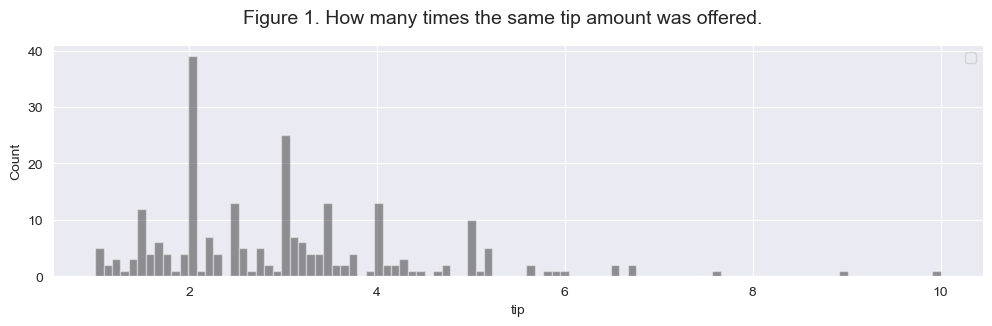

In [63]:
# Display setting
plt.subplots(figsize=(12,3))
plt.legend(prop={'size': 10})
plt.suptitle("Figure 1. How many times the same tip amount was offered.", y=1.0, fontsize=14)
#plt.xlabel('Tip')
plt.ylabel('Count')

# plot data and properties
sns.distplot(tips['tip'], bins=100, kde=False, color="k")

plt.show()

From the above figure (Fig.1) we can see that distinctly the most popular tip is 2 (units of currency), with a runner up at 3 (units of currency).

In the below figure (Fig. 2), there is shown the distribution between parties size on the left plot, and on the right plot - distribution of smokers and non-smokers among all the customers, further broken down on the tippers' gender. For this purpose `seaborn.countplot()` function is used ([Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html)). 

The below plots show the number of customers split onto days the restaurant was open. The second plot is further broken down by the size of the party (colour coded - see the legend).

/var/folders/7k/_qkqnb1d0wq82yg7_gfhpj600000gn/T/ipykernel_48981/633228363.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tips, x="day", palette="pastel", edgecolor=".5", ax=ax[0]) # number of clients on each day


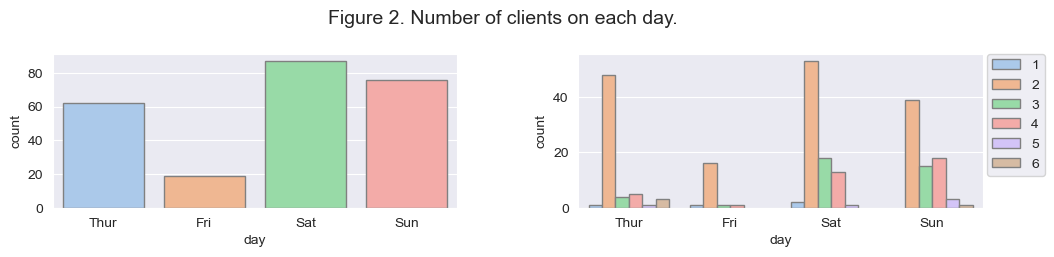

In [68]:
# Display setting
fig, ax = plt.subplots(ncols=2, figsize=(12, 2))
plt.suptitle("Figure 2. Number of clients on each day.", y=1.1, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)

# plot data and propertiesy
sns.countplot(data=tips, x="day", palette="pastel", edgecolor=".5", ax=ax[0]) # number of clients on each day
sns.countplot(data=tips, x="day", palette="pastel", edgecolor=".5", hue='size', ax=ax[1]) # additional discrimination on party sizy
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.) # Put the legend out of the figure, taken from https://stackoverflow.com/a/34579525

plt.show()

/var/folders/7k/_qkqnb1d0wq82yg7_gfhpj600000gn/T/ipykernel_48981/2458382092.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tips, y="size", palette="pastel", edgecolor=".5", ax=ax[0]) # number of clients on each day


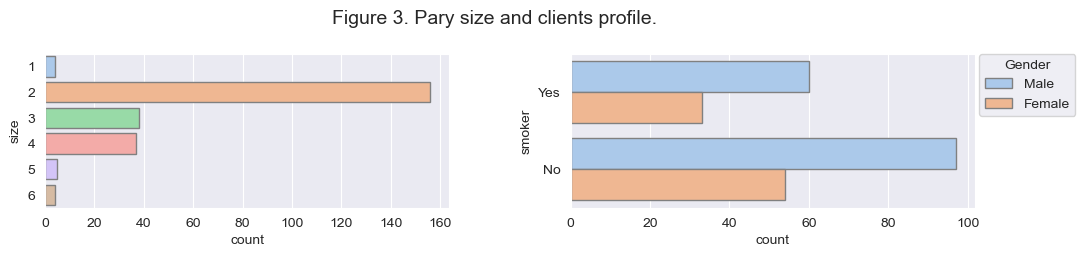

In [70]:
# Display setting
fig, ax = plt.subplots(ncols=2, figsize=(12, 2))
plt.suptitle("Figure 3. Pary size and clients profile.", y=1.1, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)


# plot data and properties
sns.countplot(data=tips, y="size", palette="pastel", edgecolor=".5", ax=ax[0]) # number of clients on each day
sns.countplot(data=tips, y="smoker", palette="pastel", edgecolor=".5", hue="sex", ax=ax[1]) # additional discrimination on party sizy
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0, title="Gender") # Put the legend out of the figure, taken from https://stackoverflow.com/a/34579525

plt.show()

As we can see, two-person groups dominate among the restaurant clients, but three- and four-person size parties are also frequent.Concerning the tipper gender and smoking habits, it turns out that it is males that usually pay the bill. Also, the number of non-smokers outbalance the number of smoking tippers.

Below, we see amount of tip offered each day, further broken down on whether the client was a smoker or not. A convenient tool for illustrating categorical data is `seaborn.barplot()` method ([Seaborn docs](https://seaborn.pydata.org/generated/seaborn.barplot.html)), and it will be used in this case. The top (the length of the bars) of the bars represent the _mean_ (in the below plots, default) of the attribute. On top of that, _Seaborn_ allows to show _confidence interval_ of the feature as well - the length of the black line. The default value of 95% confidence intervals is used in the plots below.

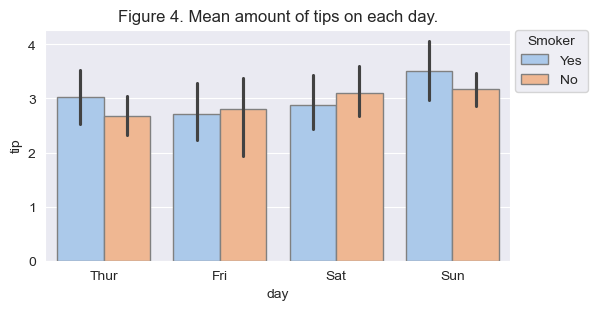

In [74]:
# adapted from https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-1-29c9478a8700
fig, ax = plt.subplots(ncols=1, figsize=(6,3))
plt.title('Figure 4. Mean amount of tips on each day.')

# Mean amount of tip on each day
sns.barplot(data = tips, x = "day", y = "tip", hue="smoker", palette="pastel", edgecolor=".5")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0, title="Smoker") # legend put outside of the plot area

plt.show()

#### Scatter plots  

Scatter plots allow for relating two (or more) numerical variables. In the below plots, function `seaborn.relplot()` is used, with the default kind of the plot (scatter),  to show statistical relationship between amount of tip on y-axis and total bill on x-axis. This section is based on official Seaborn [tutorial](https://seaborn.pydata.org/tutorial/relational.html).

/var/folders/7k/_qkqnb1d0wq82yg7_gfhpj600000gn/T/ipykernel_48981/1058577493.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=tips, x="total_bill", y="tip", s=20, palette="pastel", height=4, aspect=2)


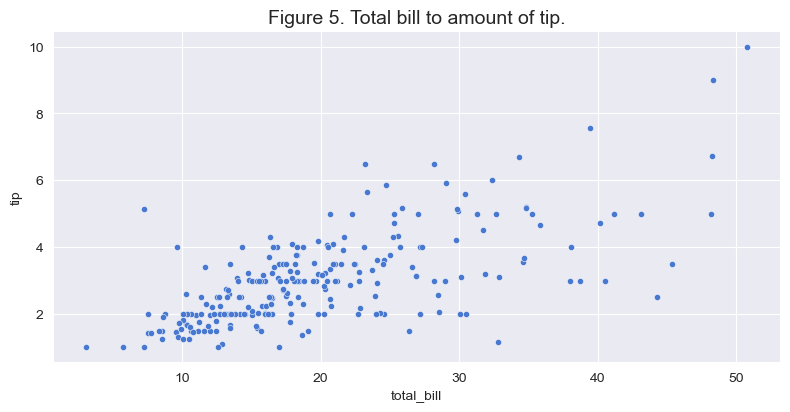

In [77]:
sns.relplot(data=tips, x="total_bill", y="tip", s=20, palette="pastel", height=4, aspect=2)
plt.title("Figure 5. Total bill to amount of tip.", fontsize=14)
plt.show()

The above plot may appear over crowded with data points. By adding another variable (for example _smoker_) it may become clearer and unveil a potential pattern, further separated by days.

The above plot indeed seem to show a linear relationship between the two variables. Before verifying that (calculation the minimum _cost_ value) in the next section, let's take a look at some other also interesting plots.

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/7k/_qkqnb1d0wq82yg7_gfhpj600000gn/T/ipykernel_48981/1485525575.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


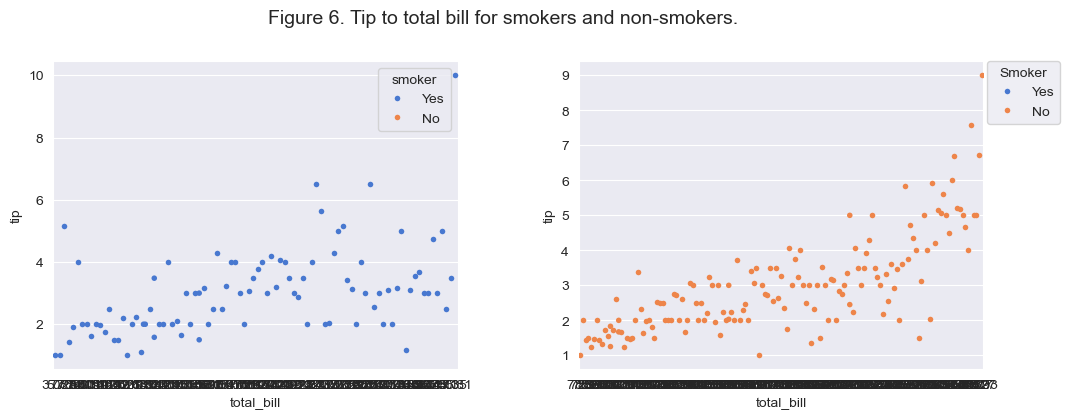

In [80]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
plt.suptitle("Figure 6. Tip to total bill for smokers and non-smokers.", y=1.01, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)

# plot #1 - Smokers
sns.swarmplot(x="total_bill", y="tip", hue="smoker", palette="muted", marker="o", s=4, data=tips[tips["smoker"] == "Yes"], ax=ax[0])

# plot #2 - Non-smokers
sns.swarmplot(x="total_bill", y="tip", hue="smoker", palette="muted", marker="o", s=4, data=tips[tips["smoker"] == "No"], ax=ax[1])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0, title="Smoker") # legend put outside of the plot area

fig.show()

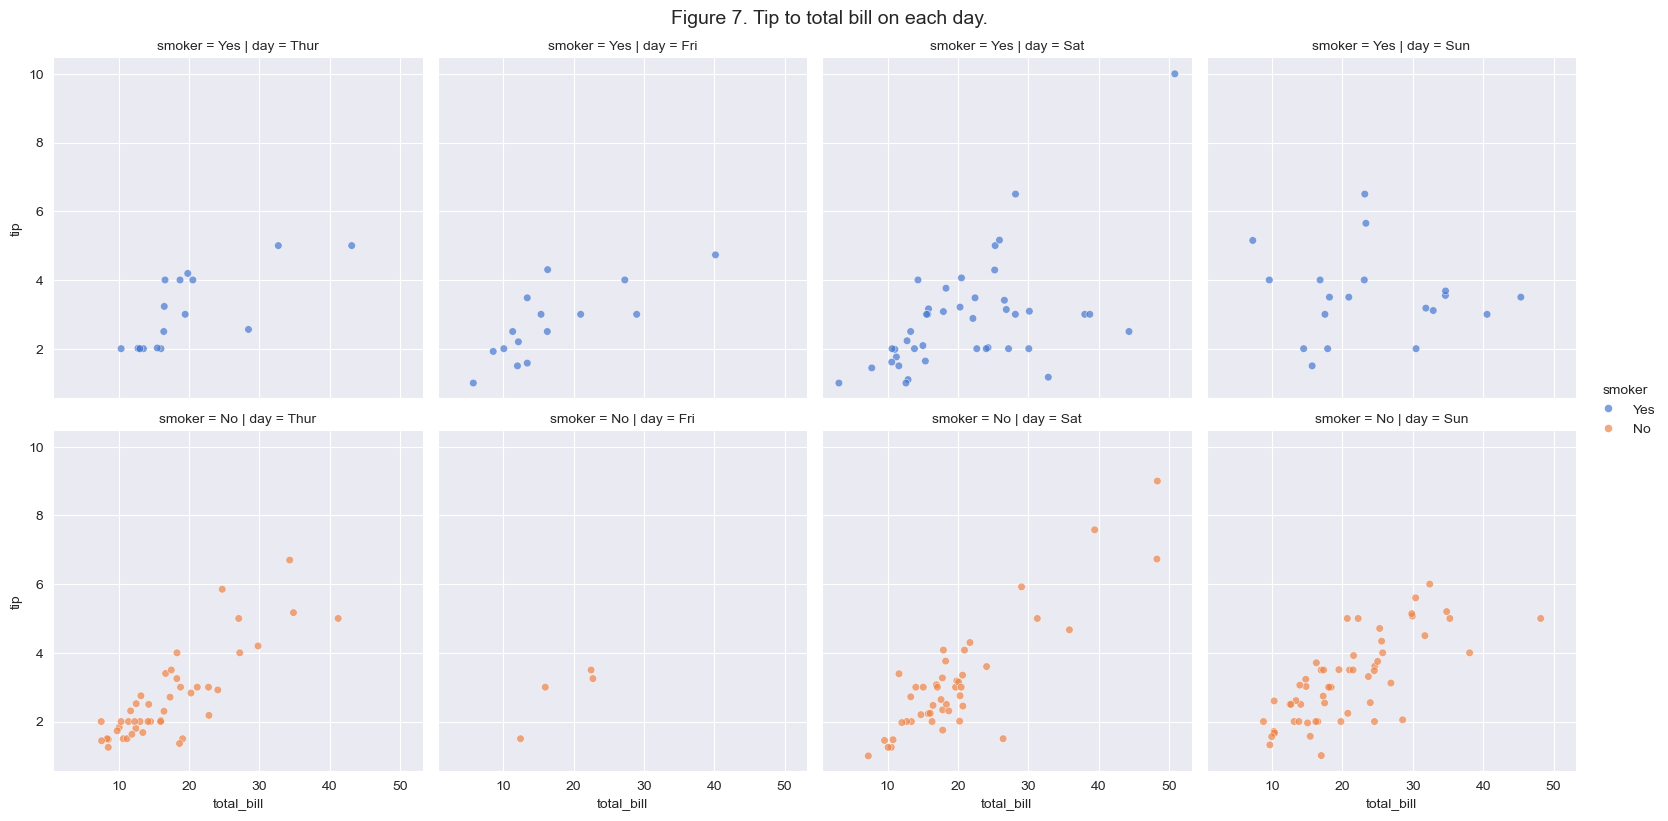

In [81]:
g = sns.relplot(data=tips, x="total_bill", y="tip", col="day", row="smoker", hue="smoker", palette="muted", marker="o", alpha=.7, s=30, height=4, aspect=1)

# Figure title; adopted from https://stackoverflow.com/a/54213918
g.fig.suptitle("Figure 7. Tip to total bill on each day.", x=0.5, y=1.02, fontsize=14)

plt.show()

Except for Sunday smokers plot, which looks a bit random, there seems to be a distinct positive relationship between the total bill and the amount of tip.

What about the amount of tips compared to the size of the party on given days? Can we see any pattern there? We will apply `catplot()` method to generate plots.

/var/folders/7k/_qkqnb1d0wq82yg7_gfhpj600000gn/T/ipykernel_48981/1190108226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=tips, x="size", y="tip", col="day", palette="muted", alpha=.7, s=4, height=4, aspect=1)


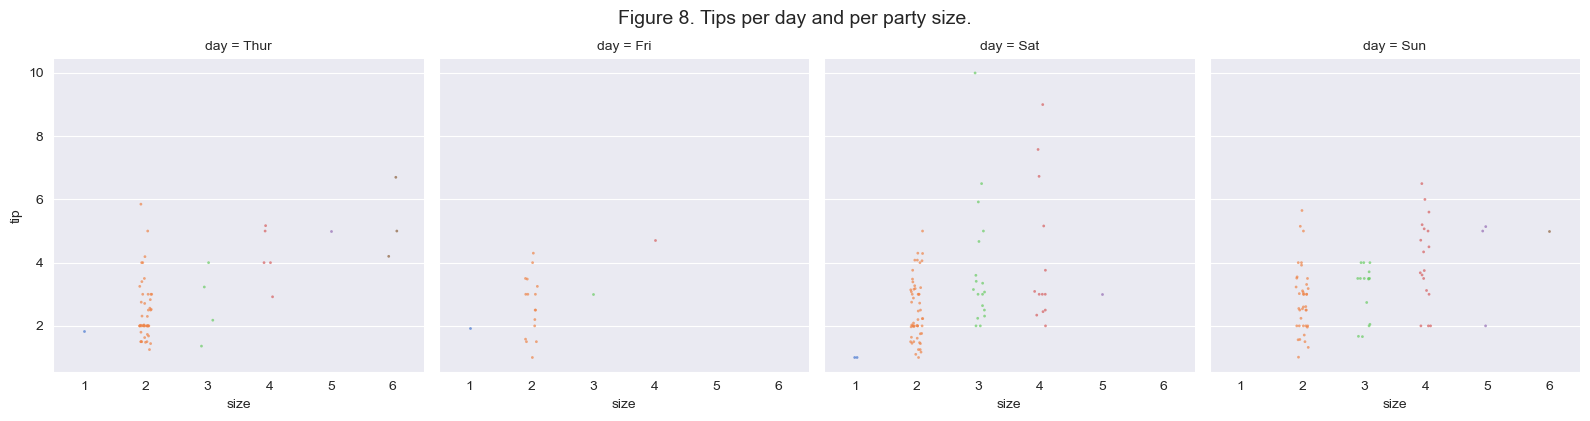

In [86]:
g = sns.catplot(data=tips, x="size", y="tip", col="day", palette="muted", alpha=.7, s=4, height=4, aspect=1)

# Figure title
g.fig.suptitle("Figure 8. Tips per day and per party size.", x=0.5, y=1.04, fontsize=14)

plt.show()

From the above plots, it appear there indeed is a relationship.

### 3.1 Regression

Regression allows to analyse the relationship between one variable (dependent variable) and other variables (independent variables, may be more than one).

In [91]:
line_eq = np.polyfit(tips["total_bill"], tips["tip"], 1) # fiting a stright line (first degree); assign to a list type

# m is stored in the first item of line_eq (index 0),
# c is stored in the second item of line_eq (index 1).

# Printing results with comment
print("Value of m is", line_eq[0], ", and value of c is", line_eq[1],".")

Value of m is 0.10502451738435337 , and value of c is 0.9202696135546721 .


Putting the scatter plot and the calculated regression line in one plot (Fig. 9).

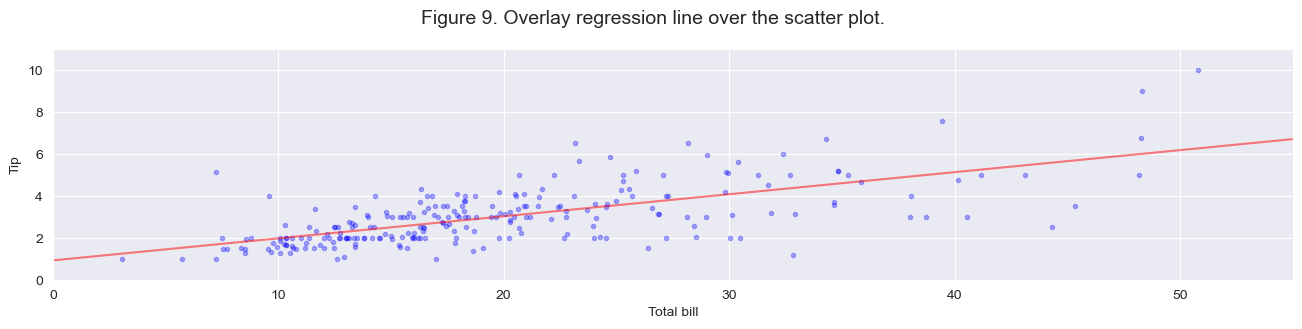

In [94]:
# Display setting
fig, ax = plt.subplots(figsize=(16,3))
plt.suptitle("Figure 9. Overlay regression line over the scatter plot.", x=0.5, y=1.01, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

# plot #1 - scatter plot
plt.plot(tips["total_bill"], tips["tip"], "b.", alpha=0.3, label="data") # pyplot
#sns.relplot(data=tips, x="total_bill", y="tip", s=20, ax=ax[0]) # seaborn - does not work as intended

# plot #2 - regression line within x-axis range between minimum and maximum total bill values
x = np.linspace(-10, 65, 2) # two values of 'y' for x at -10 and at 65
plt.plot(x, line_eq[0]*x + line_eq[1], 'r-', alpha=0.5); # drawing the regression line with calculated minimum cost; pyplot
#sns.lineplot(x, line_eq[0]*x + line_eq[1], ax=ax[0]) # drawing the regression line with calculated minimum cost; seaborn - does not work as intended

# setting plotting limits
ax.set_ylim(0, 11)
ax.set_xlim(0, 55)

# Axis labels
plt.xlabel('Total bill')
plt.ylabel('Tip')

plt.show()

#### Seaborn built-in functionality

A very similar result the above plot can be generated with Seaborn's `regplot()` method, which offers a built-in functionality for drawing linear regression line automatically. Once again, let's make a plot showing total bill against tip, with additional regression line to the plot (Fig.10). Based on the Seaborn [tutorial](https://seaborn.pydata.org/tutorial/regression.html).

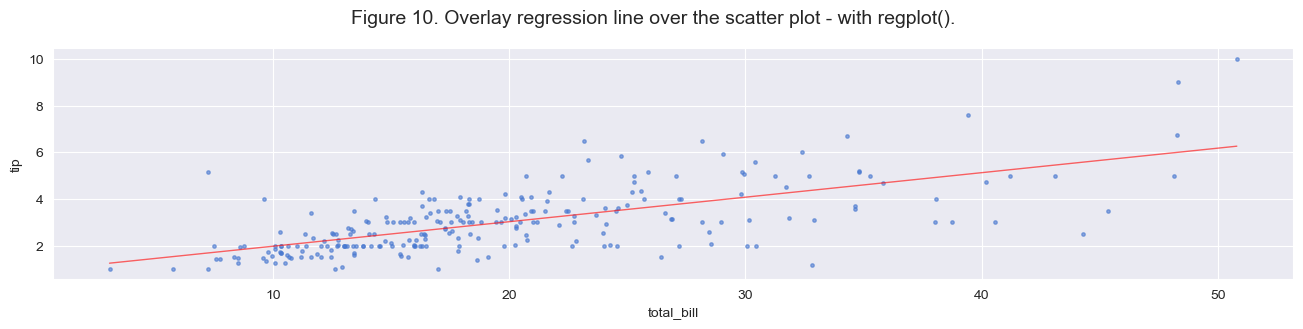

In [98]:
# Display setting
fig, ax = plt.subplots(figsize=(16,3))
plt.suptitle("Figure 10. Overlay regression line over the scatter plot - with regplot().", x=0.5, y=1.01, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

sns.regplot(data=tips, x="total_bill", y="tip", ci=0, scatter_kws={"s": 6, "alpha":0.6}, line_kws={"lw":1, "color":"r", "alpha":0.6}) # confidence interval set to 0 for clarity
plt.show()

Let's now take a look at other, arguably more interesting plots that can be produced from the dataset.

First, let us now consider the data with variables discrimination on each day and whether the client was a smoker or not (Fig.11).

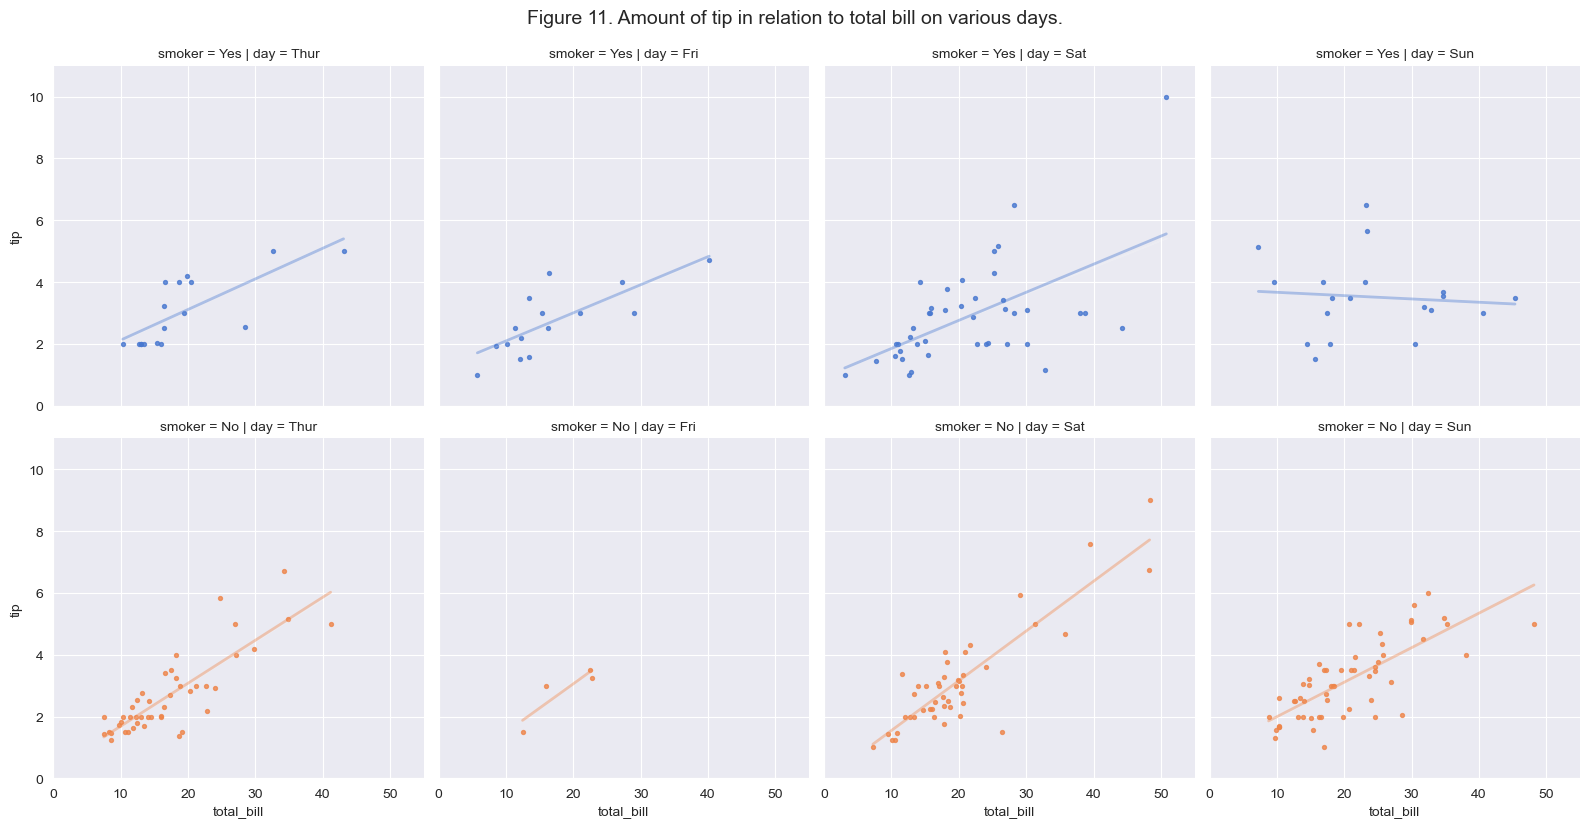

In [101]:
# adapded from https://stackoverflow.com/a/25213438
lm = sns.lmplot(data=tips, x="total_bill", y="tip", col="day", row="smoker", hue="smoker", ci=0, height=4, aspect=1, palette="muted", scatter_kws={"s":8}, line_kws={"lw":2, "alpha":0.4})

# plot's title
plt.suptitle("Figure 11. Amount of tip in relation to total bill on various days.", x=0.5, y=1.03, fontsize=14)

# axes limits
axes = lm.axes
axes[0,0].set_ylim(0,11)
axes[0,0].set_xlim(0,55)

plt.show()

An interesting results yield the next set of plots (Fig.12), showing a tendency of decrease tip amount per person for larger group of people (slope of the regression line).

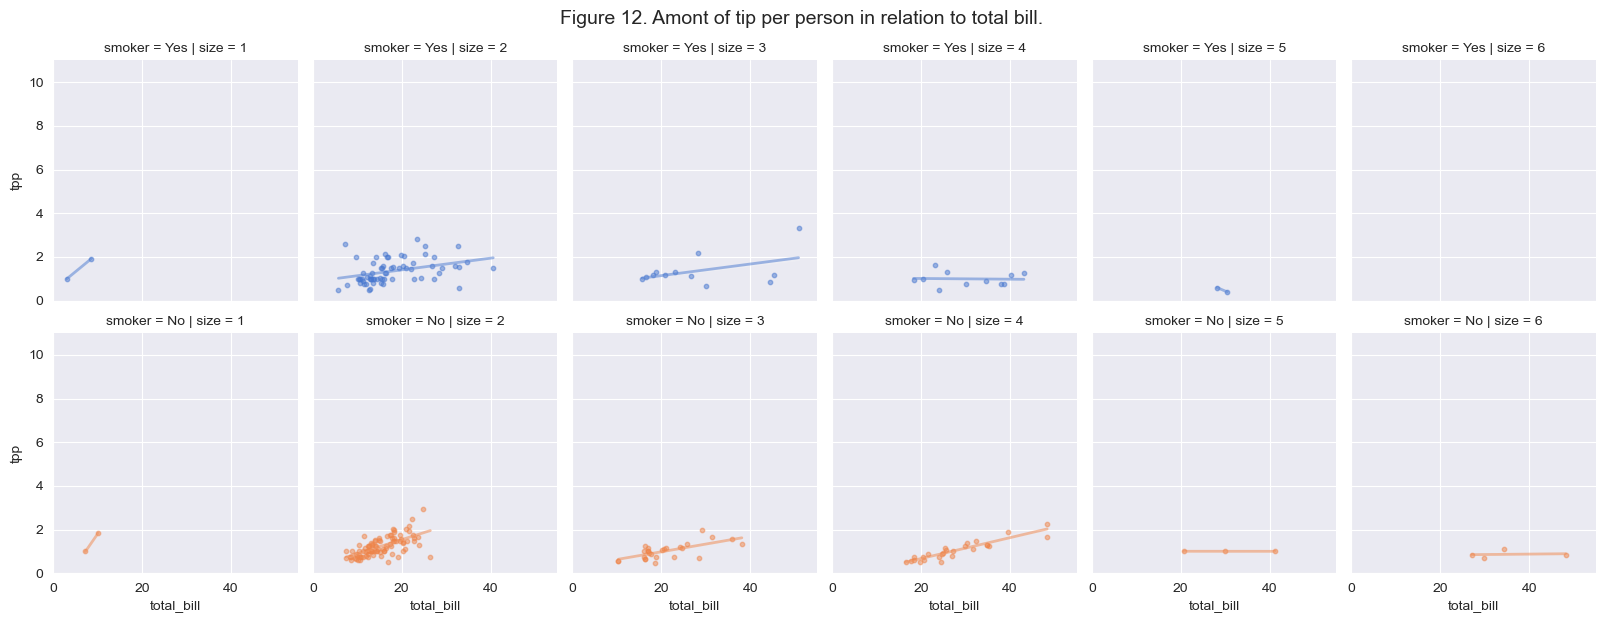

In [104]:
# defining the plot as an object
lm = sns.lmplot(data=tips, x="total_bill", y="tpp", col="size", row="smoker", hue="smoker", ci=0, height=3, aspect=.9, palette="muted", scatter_kws={"s":10, "alpha":0.5}, line_kws={"lw":2, "alpha":0.5})

# plot's title
plt.suptitle("Figure 12. Amont of tip per person in relation to total bill.", x=0.5, y=1.03, fontsize=14)

# setting axes limits 
axes = lm.axes
axes[0,0].set_ylim(0,11)
axes[0,0].set_xlim(0,55)

plt.show()

#### Tip percent to total bill relationship

An interesting results is revealed by plotting data points of the percent of tip in relation to total bill. There seems to be a clear negative correlation between the two variables. From the below plot (Fig. 13) one can see a tendency to lower the tip percent (in relation to the total bill) as the bill goes up. The fact is also highlighted by closely fitting linear regression line, as shown in figure 13, below. 

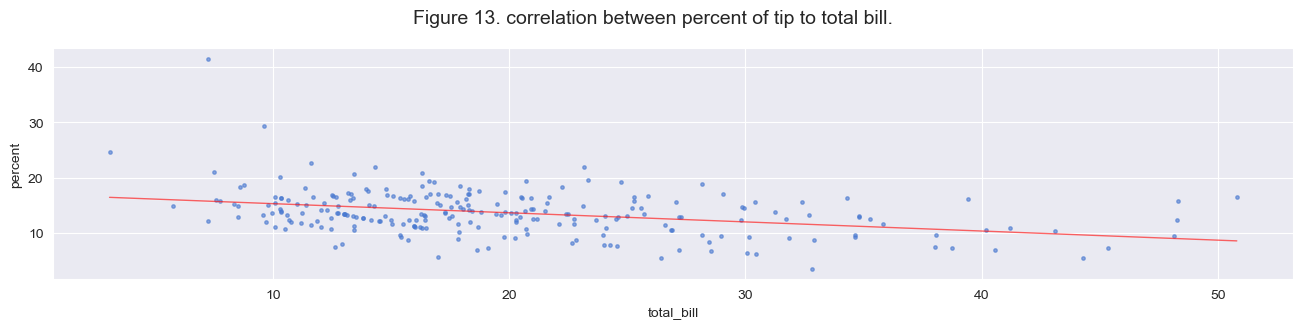

In [107]:
# Display setting
fig, ax = plt.subplots(figsize=(16,3))
plt.suptitle("Figure 13. correlation between percent of tip to total bill.", x=0.5, y=1.01, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

sns.regplot(data=tips, x="total_bill", y="percent", ci=0, scatter_kws={"s": 6, "alpha":0.6}, line_kws={"lw":1, "color":"r", "alpha":0.6}) # confidence interval set to 0 for clarity
plt.show()

___
### 3.2 k-nearest neighbours algorithm

In [113]:
import sklearn.neighbors as nei
import sklearn.model_selection as mod

The variables tip, total bill and the smoker are deemed the most suitable for my analysis. The other variables combinations produce more fuzzy plots (a lot of 
overlapping data points). 

For the purpose of this exercise, I am going to work on a simplified dataset. This will be done by coping the tips dataset I was working above, but getting rid of redundant columns.

In [116]:
# A new, reduced dataset
tips2 = tips[["total_bill", "tip", "smoker"]]

In [118]:
tips2.head(2)

,total_bill,tip,smoker
0,16.99,1.01,No
1,10.34,1.66,No


The below plot shows relationship between the variables. 

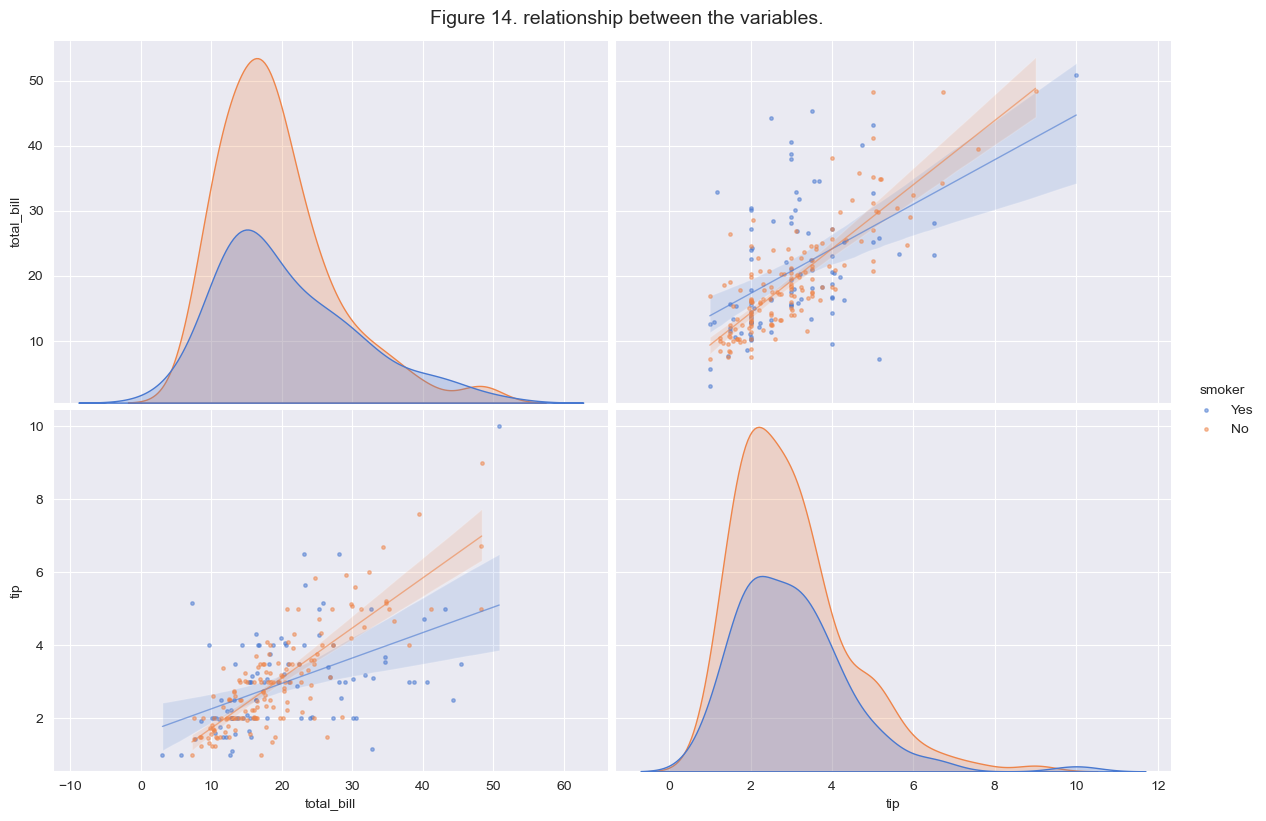

In [121]:
# Display setting
sns.pairplot(tips2, kind="reg", hue="smoker", height=4, aspect=1.5, plot_kws={"line_kws":{"lw":1, "alpha":0.6}, "scatter_kws":{"s": 6, "alpha":0.5}})

plt.suptitle("Figure 14. relationship between the variables.", x=0.5, y=1.02, fontsize=14)

plt.show()

Assigning `Inputs` and `Outputs`

In [124]:
inputs = tips2[['total_bill', 'tip']]
outputs = tips2['smoker']

Classifier `knn`

In [127]:
knn = nei.KNeighborsClassifier(n_neighbors=5) # will consider 5 nearest neighbours

Applying `fit` function

In [130]:
knn.fit(inputs, outputs)

KNeighborsClassifier()

Evaluation of the results

In [133]:
(knn.predict(inputs) == outputs).sum() # Returns number of correctly recognised samples; total number of samples is 244

181

Training and testing data sub-sets.

The dataset is split randomly into:  
1) training (75% of entire dataset size, i.e. 183), and  
2) testing (25%, i.e. 61)

In [136]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.25)

In [138]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [140]:
# knn.predict(inputs_test) == outputs_test

In [142]:
answer = (knn.predict(inputs_test) == outputs_test).sum()
answer

37

Hence, the accuracy of the algorithm is the ratio of correctly recognised to actual number, and is shown below.

In [145]:
print("%.02f" % ((answer/61) * 100), "%")

60.66 %


# SVR

In [155]:
from sklearn.svm import SVR
svr = SVR()

In [163]:
x = tips[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['total_bill']

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [167]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,Male,Yes,Sat,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
68,2.01,Male,No,Sat,Dinner,2
184,3.00,Male,Yes,Sun,Dinner,2


In [169]:
#feature encoding for binary (label and one hot encoding)
from sklearn.preprocessing import LabelEncoder

In [171]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
#as we have 3 binary o/p so we use label encoding

In [173]:
X_train['sex'] = le1.fit_transform(X_train['sex'])
X_train['smoker'] =le2.fit_transform(X_train['smoker'])
X_train['time'] =le3.fit_transform(X_train['time'])


In [175]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,1,1,Sat,0,2
1,1.66,1,0,Sun,0,3
2,3.50,1,0,Sun,0,3
68,2.01,1,0,Sat,0,2
184,3.00,1,1,Sun,0,2


In [177]:
X_test['sex'] = le1.transform(X_test['sex'])
X_test['smoker'] =le2.transform(X_test['smoker'])
X_test['time'] =le3.transform(X_test['time'])


In [179]:
X_test.head()

,tip,sex,smoker,day,time,size
162,2.00,0,0,Sun,0,3
60,3.21,1,1,Sat,0,2
61,2.00,1,1,Sat,0,2
63,3.76,1,1,Sat,0,4
69,2.09,1,1,Sat,0,2


In [183]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [185]:
ct = ColumnTransformer(transformers =[('onehot',OneHotEncoder(drop='first'),[3])]
                                    ,remainder='passthrough')
 # ('onehot', OneHotEncoder(drop='first'), [3])  # Column index for one-hot encoding
 #    ],
 #    remainder='passthrough'  # Keep the rest of the columns
# )

In [187]:
X_train=ct.fit_transform(X_train)

In [189]:
X_test = ct.transform(X_test)

In [191]:
from sklearn.svm import SVR
svr = SVR()

In [193]:
svr.fit(X_train,Y_train)

SVR()

In [195]:
Y_pred = svr.predict(X_test)

In [197]:
from sklearn.metrics import r2_score,mean_absolute_error

In [199]:
print (r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

0.4602811456115927
4.1486423210190235


In [201]:
#hyperparamerter tunninng
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf']}


In [203]:
grid = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.145 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.025 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.089 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.013 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.021 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.124 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.050 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [205]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [207]:
grid_predict=grid.predict(X_test)

In [209]:
print (r2_score(Y_test,grid_predict))
print(mean_absolute_error(Y_test,grid_predict))

0.5081599655420066
3.8685177092539527


___
## Summary

As a conclusion of the above analysis, I infer the main findings as follows.
- On average the tips are 13.64% of the bill.
- There is a strong linear relationship between the amount of tip and the total bill for the entire dataset - the larger the bill, the larger the tip.
- There is a tendency to lower the tip-to-bill ratio as the bill goes up.
- As the party size increases, so does the amount of tip. However, the larger the party, the tip per person is lower.
- The smoking tippers are fewer, but more generous in terms of total bill and amount of tip.
